Exercise-3.1



In [2]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('synth_temp-Copy1.csv')
df.head()

,Region,Year,RgnAvTemp
0,A,1841,12.557395
1,B,1841,13.267048
2,E,1841,12.217463
3,F,1841,13.189420
4,A,1842,13.462887


In [5]:
print(f" There are  {len(df.loc[df.Year == 1841])} data points in 1841 \
         \n and \n \
         there are {len(df.loc[df.Year == 1902])} points in 1902 \
         \n and \n \
         and there are {len(df.loc[df.Year == 2010])} points in 2010")

 There are  4 data points in 1841          
 and 
          there are 12 points in 1902          
 and 
          and there are 12 points in 2010


data points per year

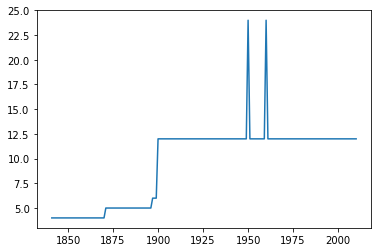

In [6]:
fig , ax = plt.subplots()

ax.plot(df.Year.unique(), [len(df.loc[df.Year == i]) for i in df.Year.unique()])
plt.show()

In [7]:
df = df.loc[df.Year > 1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


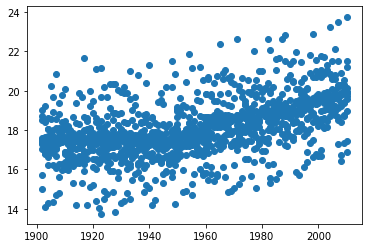

In [8]:
fig , ax = plt.subplots()
ax.scatter( df.Year, df.RgnAvTemp)
plt.show()

In [9]:
df_group_year = df.groupby('Year').agg(np.mean).rename(columns= {'RgnAvTemp' :'AvgTemp'})
df_group_year.head()

,AvgTemp
Year,
1902,17.385044
1903,17.222163
1904,17.217215
1905,17.817502
1906,17.386445


Exercise-3.2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('synth_temp-Copy1.csv')

In [12]:
df = df.loc[df.Year >1901]
df_group_year = df.groupby('Year').agg({'RgnAvTemp':'mean'})

df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns={'RgnAvTemp':'AvgTemp'})

df_group_year.head()

,AvgTemp,Year
Year,,
1902,17.385044,1902
1903,17.222163,1903
1904,17.217215,1904
1905,17.817502,1905
1906,17.386445,1906


In [13]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(df_group_year.Year.values.reshape((-1,1)), df_group_year.AvgTemp)
r2_score = linear_model.score(df_group_year.Year.values.reshape((-1,1)), df_group_year.AvgTemp)
print('model slope',linear_model.coef_[0])
print('model intercept',linear_model.intercept_)
print('r2 score', r2_score)


model slope 0.02352237024970654
model intercept -27.88736502793287
r2 score 0.8438499294671093


In [14]:
pred_x = df_group_year.loc[:,'Year']

In [15]:
pred_y = linear_model.predict(df_group_year.Year.values.reshape((-1,1)))

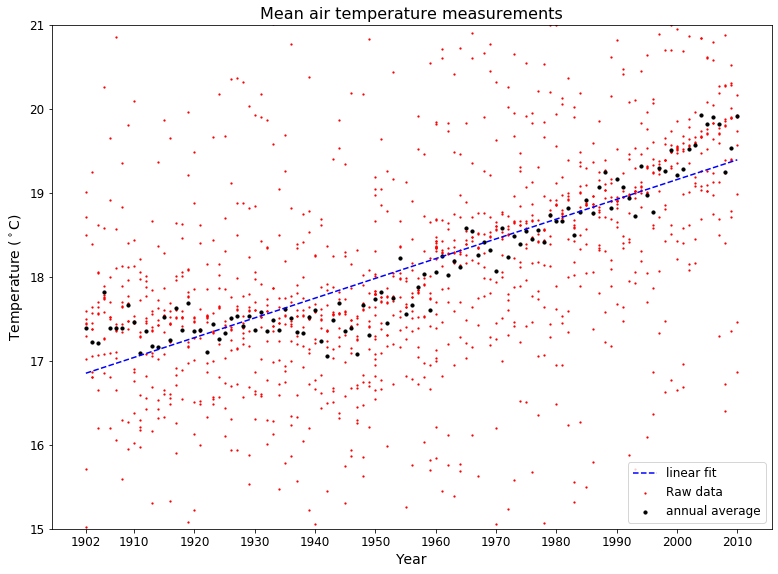

In [16]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
raw_data = df.loc[df.Year >1901]
ax.scatter(raw_data.Year, raw_data.RgnAvTemp, label = 'Raw data', c='red', s=1.5)
ax.scatter(df_group_year.Year, df_group_year.AvgTemp,label='annual average', c='k', s= 10)
ax.plot(pred_x, pred_y, linestyle = '--', label='linear fit', c='blue')
ax.set_title('Mean air temperature measurements', fontsize=16)
tick_years = [1902] + list(range(1910,2011,10))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize=14)
ax.set_ylim(15,21)
ax.legend(fontsize=12)
plt.show()

#### Exercise 3.03

In [17]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [18]:
df = pd.read_csv('synth_temp-Copy1.csv')
df = df.loc[df.Year >1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


In [19]:
df_group_year = df.groupby(['Year','Region']).agg({'RgnAvTemp':'mean'})
df_group_year.head(12)

RgnAvTemp
Year Region           
1902 A       17.021583
     B       17.590253
     C       17.493082
     D       18.706166
     E       17.390903
     F       17.438122
     G       18.494440
     H       15.708989
     I       19.012183
     J       17.292191
     K       15.020913
     L       17.451698

In [20]:
df_group_year['Region']=df_group_year.index.get_level_values(1)
df_group_year['Year']= df_group_year.index.get_level_values(0)

df_group_year.head()

RgnAvTemp Region  Year
Year Region                        
1902 A       17.021583      A  1902
     B       17.590253      B  1902
     C       17.493082      C  1902
     D       18.706166      D  1902
     E       17.390903      E  1902

In [21]:
df_group_year = df_group_year.droplevel(0,axis=0)
df_group_year.head()

,RgnAvTemp,Region,Year
Region,,,
A,17.021583,A,1902
B,17.590253,B,1902
C,17.493082,C,1902
D,18.706166,D,1902
E,17.390903,E,1902


In [22]:
df_group_year = df_group_year.reset_index(drop=True)
df_group_year.head()

,RgnAvTemp,Region,Year
0,17.021583,A,1902
1,17.590253,B,1902
2,17.493082,C,1902
3,18.706166,D,1902
4,17.390903,E,1902


In [23]:
region_temps = df_group_year.groupby('Region').agg({'RgnAvTemp':'mean'}).rename(columns={'RgnAvTemp':'RegTemp'})
region_temps

,RegTemp
Region,
A,17.711676
B,18.458397
C,18.247599
D,19.002573
E,17.465435
F,18.194091
G,19.368791
H,16.571519
I,20.186552


In [24]:
colors = ['red', 'green', 'blue', 'black', 'lightcoral', 'palegreen',
          'skyblue', 'lightslategray', 'magenta', 'chartreuse', 'lightblue',
          'olive']
len(colors)

12

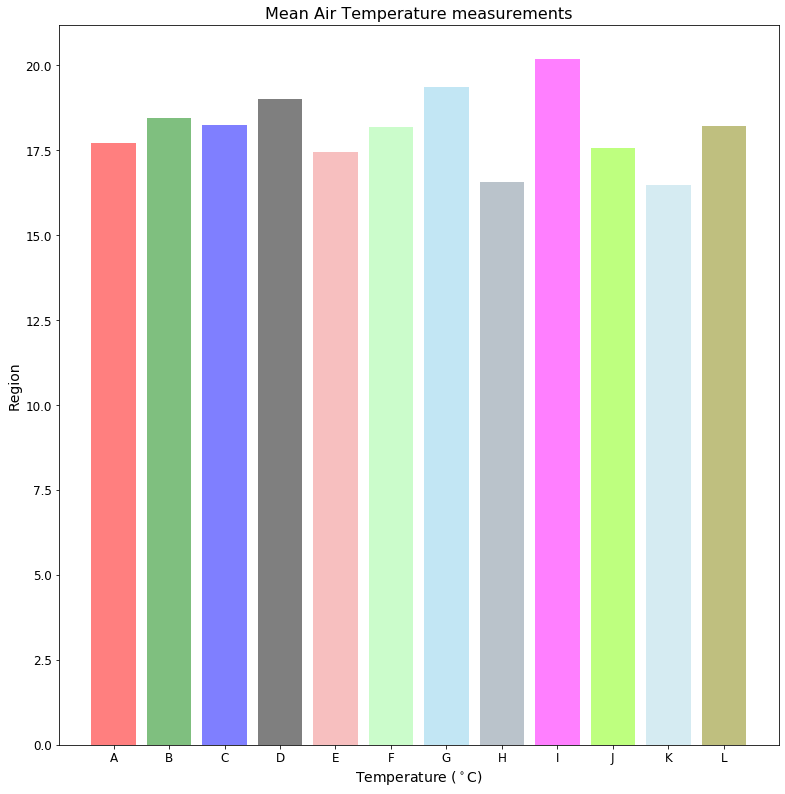

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([1,1,1,1])
ax.bar(region_temps.index, region_temps.RegTemp, label= "Regional Temperature(annual averages)", color= colors,alpha = 0.5)
ax.set_title("Mean Air Temperature measurements", fontsize=16)
ax.set_xlabel("Temperature ($^\circ$C)",fontsize=14)
ax.set_ylabel("Region",fontsize=14)
ax.tick_params(labelsize=12)
plt.show()


In [26]:
dummy_cols=pd.get_dummies(df_group_year.Region,drop_first=True)
df_group_year=pd.concat([df_group_year,dummy_cols],axis=1)
#df_group_year=df_group_year.drop('Region',axis=1)
df_group_year

,RgnAvTemp,Region,Year,B,C,D,E,F,G,H,I,J,K,L
0,17.021583,A,1902,0,0,0,0,0,0,0,0,0,0,0
1,17.590253,B,1902,1,0,0,0,0,0,0,0,0,0,0
2,17.493082,C,1902,0,1,0,0,0,0,0,0,0,0,0
3,18.706166,D,1902,0,0,1,0,0,0,0,0,0,0,0
4,17.390903,E,1902,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,16.867440,H,2010,0,0,0,0,0,0,1,0,0,0,0
1304,23.772483,I,2010,0,0,0,0,0,0,0,1,0,0,0
1305,18.982479,J,2010,0,0,0,0,0,0,0,0,1,0,0
1306,17.462226,K,2010,0,0,0,0,0,0,0,0,0,1,0


In [27]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(df_group_year.loc[:,'Year':'L'], df_group_year.RgnAvTemp)
r2=linear_model.score(df_group_year.loc[:,'Year':'L'],df_group_year.RgnAvTemp)
print('r squared', r2)

r squared 0.7778768442731825


In [28]:
pred_X = df_group_year.drop(['RgnAvTemp','Region'],axis =1)
pred_Y = linear_model.predict(pred_X)
pred_Y


array([16.44146838, 17.1881888 , 16.9773911 , ..., 18.84360637,
       17.75459427, 19.47448492])

In [29]:
preds= pd.concat([pred_X,df_group_year.RgnAvTemp,df_group_year.Region,pd.Series(pred_Y)],axis=1)
preds.head()

,Year,B,C,D,E,F,G,H,I,J,K,L,RgnAvTemp,Region,0
0,1902,0,0,0,0,0,0,0,0,0,0,0,17.021583,A,16.441468
1,1902,1,0,0,0,0,0,0,0,0,0,0,17.590253,B,17.188189
2,1902,0,1,0,0,0,0,0,0,0,0,0,17.493082,C,16.977391
3,1902,0,0,1,0,0,0,0,0,0,0,0,18.706166,D,17.732365
4,1902,0,0,0,1,0,0,0,0,0,0,0,17.390903,E,16.195227


In [30]:
preds.rename(columns = {0:'Pred_temp'}, inplace=True)
preds.head()

,Year,B,C,D,E,F,G,H,I,J,K,L,RgnAvTemp,Region,Pred_temp
0,1902,0,0,0,0,0,0,0,0,0,0,0,17.021583,A,16.441468
1,1902,1,0,0,0,0,0,0,0,0,0,0,17.590253,B,17.188189
2,1902,0,1,0,0,0,0,0,0,0,0,0,17.493082,C,16.977391
3,1902,0,0,1,0,0,0,0,0,0,0,0,18.706166,D,17.732365
4,1902,0,0,0,1,0,0,0,0,0,0,0,17.390903,E,16.195227


In [31]:
annual_plot_data= df_group_year.groupby('Year').agg({'RgnAvTemp':'mean'})
annual_plot_data.head()

,RgnAvTemp
Year,
1902,17.385044
1903,17.222163
1904,17.217215
1905,17.817502
1906,17.386445


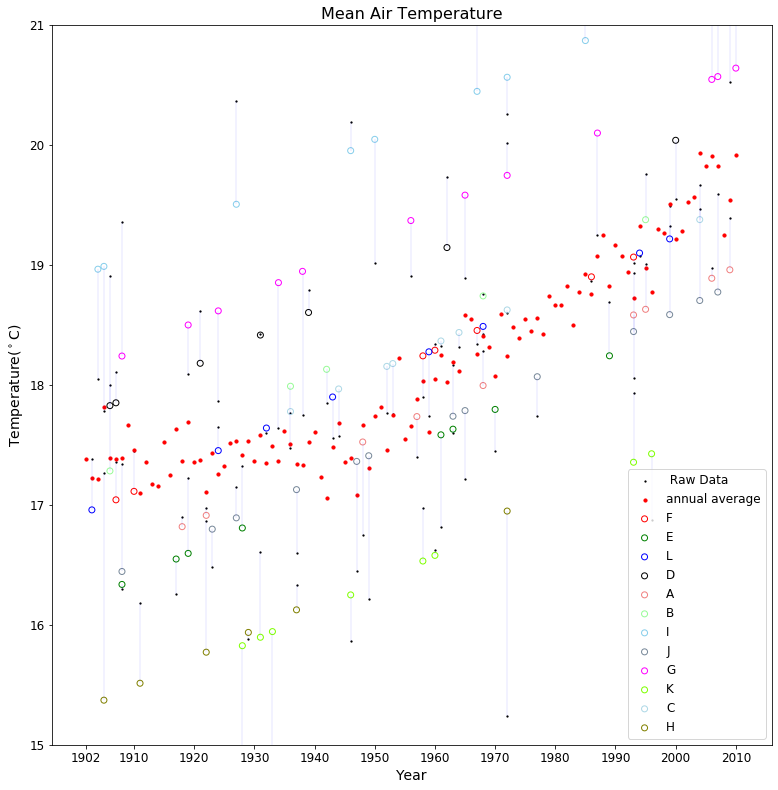

In [32]:
np.random.seed(42)
plot_data = preds.sample(n=100)
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([1,1,1,1])
raw_plot_data = plot_data
ax.scatter(raw_plot_data.Year,raw_plot_data.RgnAvTemp,label=' Raw Data ', c= 'k',s=1.5 )
annual_plot_data= df_group_year.groupby('Year').agg({'RgnAvTemp':'mean'})
ax.scatter(annual_plot_data.index, annual_plot_data.RgnAvTemp, label='annual average', c='red',s=10)

#plotting predictions

fit_data = plot_data

for i in range(len(fit_data.Region.unique())):
    region = fit_data.Region.unique()[i]
    plot_region = fit_data.loc[fit_data.Region == region,:]
    ax.scatter(plot_region.Year, plot_region.Pred_temp ,label=region, facecolor='none',edgecolor=colors[i])
    
for i in fit_data.index:
    ax.plot([fit_data.Year[i],fit_data.Year[i]],[fit_data.RgnAvTemp[i], fit_data.Pred_temp[i]], '-', linewidth=0.1,c='blue')

tick_years = [1902]+ list(range(1910,2011,10))
ax.set_title('Mean Air Temperature',fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Temperature($^\circ$C)',fontsize=14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.set_ylim(15,21)

ax.legend(fontsize=12)

plt.show()

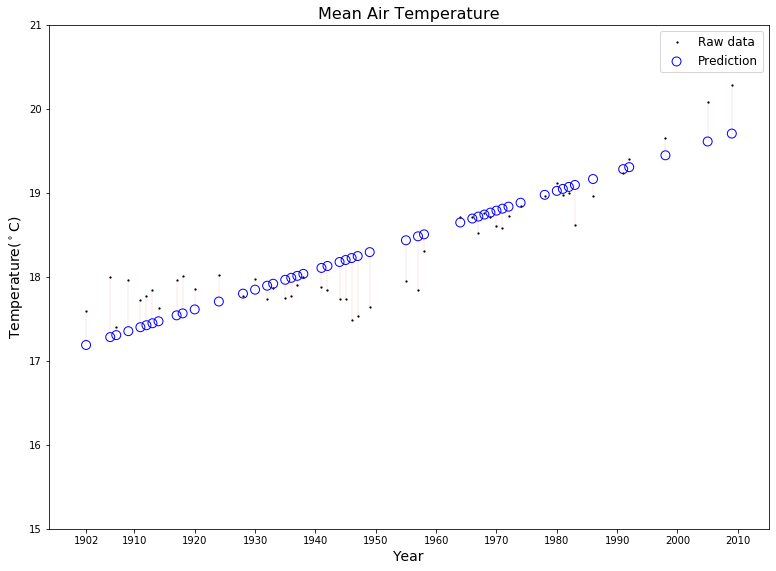

In [33]:
np.random.seed(42)
region_B= preds.loc[preds.B==1,:]
plot_data = region_B.sample(n=50)
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(plot_data.Year, plot_data.RgnAvTemp,label = 'Raw data',c='k', s=1.5)
ax.scatter(plot_data.Year,plot_data.Pred_temp, label='Prediction', facecolor= 'none',edgecolor='blue',s=80)
for i in plot_data.index:
    ax.plot([plot_data.Year[i], plot_data.Year[i]], [plot_data.RgnAvTemp[i], plot_data.Pred_temp[i] ],linewidth=0.1, linestyle='-',c='red')
ax.set_title('Mean Air Temperature', fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Temperature($^\circ$C)',fontsize=14)
tick_years= [1902]+list(range(1910,2011,10))
ax.set_xticks(tick_years)
ax.set_ylim(15,21)
ax.legend(fontsize=12)
plt.show()
    

#### Exercise - 3.04

In [34]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('synth_temp-Copy1.csv')
df = df.loc[df.Year >1901]
df.head()


,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


In [36]:
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp':'mean'})
df_group_year.head()

,RgnAvTemp
Year,
1902,17.385044
1903,17.222163
1904,17.217215
1905,17.817502
1906,17.386445


In [37]:
df_group_year['Year']= df_group_year.index
df_group_year = df_group_year.rename(columns={'RgnAvTemp':'AvgTemp'})
df_group_year['Year2'] = df_group_year.Year.values ** 2
df_group_year.head()

,AvgTemp,Year,Year2
Year,,,
1902,17.385044,1902,3617604
1903,17.222163,1903,3621409
1904,17.217215,1904,3625216
1905,17.817502,1905,3629025
1906,17.386445,1906,3632836


In [38]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(df_group_year.loc[:,['Year','Year2']] , df_group_year.AvgTemp)
coef = linear_model.coef_
intercept = linear_model.intercept_
print(f'coefficients of the model {coef} and intercept of the model {intercept}')

r2 = linear_model.score(df_group_year.loc[:,['Year','Year2']], df_group_year.AvgTemp)
print('r squared', r2)


coefficients of the model [-1.02981369e+00  2.69257683e-04] and intercept of the model 1002.0087338444181
r squared 0.9313996496373735


In [39]:
pred_x = df_group_year.loc[:,['Year','Year2']]
pred_y = linear_model.predict(pred_x)
pred_x_future = pd.DataFrame(list(range(2011,2021))).rename(columns={0:'Year'})
pred_x_future['Year2']= pred_x_future.Year.values **2
pred_x_future.head()

,Year,Year2
0,2011,4044121
1,2012,4048144
2,2013,4052169
3,2014,4056196
4,2015,4060225


In [40]:
pred_y_future = linear_model.predict(pred_x_future)


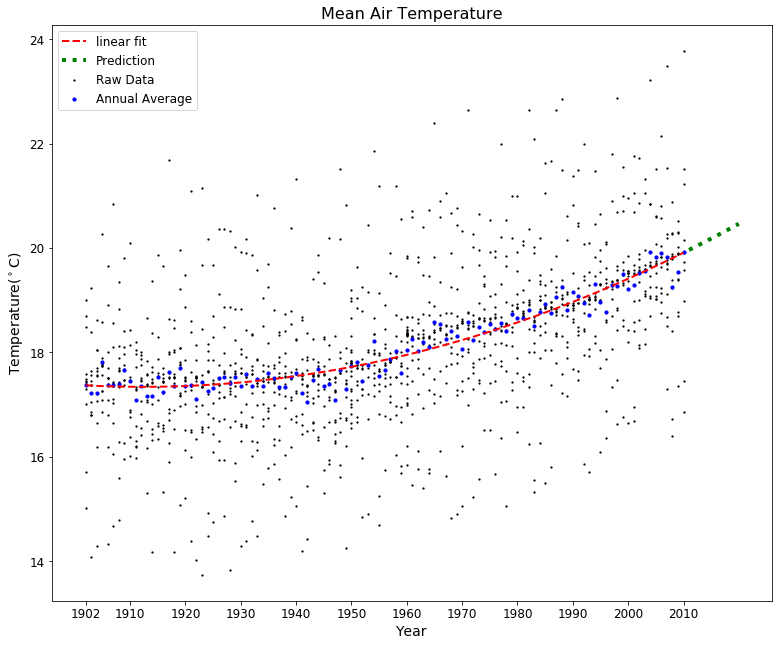

In [41]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
raw_plot_data = df
ax.scatter(df.Year, df.RgnAvTemp, label = 'Raw Data', c='k', s=1.5)
#annual average
ax.scatter(df_group_year.Year, df_group_year.AvgTemp, label= 'Annual Average', c='blue',s=10)
#linear fit
ax.plot(pred_x.Year.values, pred_y, label = 'linear fit', linestyle='--', c ='red', linewidth=2)
#future prediction
ax.plot(pred_x_future.Year.values, pred_y_future, label='Prediction',linestyle=':',c='green',linewidth=4)
ax.set_title('Mean Air Temperature', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature($^\circ$C)', fontsize=14)
tick_years= [1902]+list(range(1910,2011,10))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

#### Exercise 3.05

In [42]:
#model function
def h_x(beta,X):
    return np.dot(beta,X).flatten()

In [43]:
#cost function
def j_beta(pred,true):
    return np.mean((pred-true)**2)

In [44]:
#update function
def update(pred,true,X,gamma):
    return gamma*np.sum((true-pred)*X,axis=1)

In [45]:
# load the data
df = pd.read_csv('../Datasets/synth_temp.csv')
# slice 1902 and forward
df = df.loc[df.Year > 1901]
# roll up by year
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' : 'mean'})
# add the Year column so we can use that in a model
df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})

In [46]:
x_min = df_group_year.Year.min()
x_range = df_group_year.Year.max()- df_group_year.Year.min()

y_min = df_group_year.AvTemp.min()
y_range = df_group_year.AvTemp.max()-df_group_year.AvTemp.min()

scale_x = (df_group_year.Year - x_min)/x_range
scale_y = (df_group_year.AvTemp - y_min)/y_range


train_x = pd.DataFrame({'X0': np.ones(df_group_year.shape[0]),
                        'X1': scale_x
                       }).transpose()
train_y = scale_y


In [47]:
print(train_x.iloc[:,:5])
print(train_y[:5])

Year  1902      1903      1904      1905      1906
X0     1.0  1.000000  1.000000  1.000000  1.000000
X1     0.0  0.009259  0.018519  0.027778  0.037037
Year
1902    0.114676
1903    0.058017
1904    0.056296
1905    0.265110
1906    0.115164
Name: AvTemp, dtype: float64


In [48]:
np.random.seed(42)
beta = np.random.randn(2).reshape((1,2))*0.1
beta

array([[ 0.04967142, -0.01382643]])

In [49]:
gamma = 0.0005
max_epochs = 100

In [50]:
y_pred = h_x(beta, train_x)
print('initial cost J(Beta)', str(j_beta(y_pred,train_y)))

initial cost J(Beta) 0.18849128813354338


In [51]:
epochs = []
costs = []
for epoch in range(max_epochs):
    beta += update(y_pred,train_y,train_x,gamma)
    y_pred = h_x(beta,train_x)
    cost = j_beta(y_pred,train_y)
    if epoch % 10 ==0:
        print('New cost'+str(round(cost,3)) + 'at epoch'+ str(epoch))
    epochs.append(epoch)
    costs.append(cost)

New cost0.171at epoch0
New cost0.083at epoch10
New cost0.06at epoch20
New cost0.052at epoch30
New cost0.048at epoch40
New cost0.046at epoch50
New cost0.043at epoch60
New cost0.041at epoch70
New cost0.039at epoch80
New cost0.037at epoch90


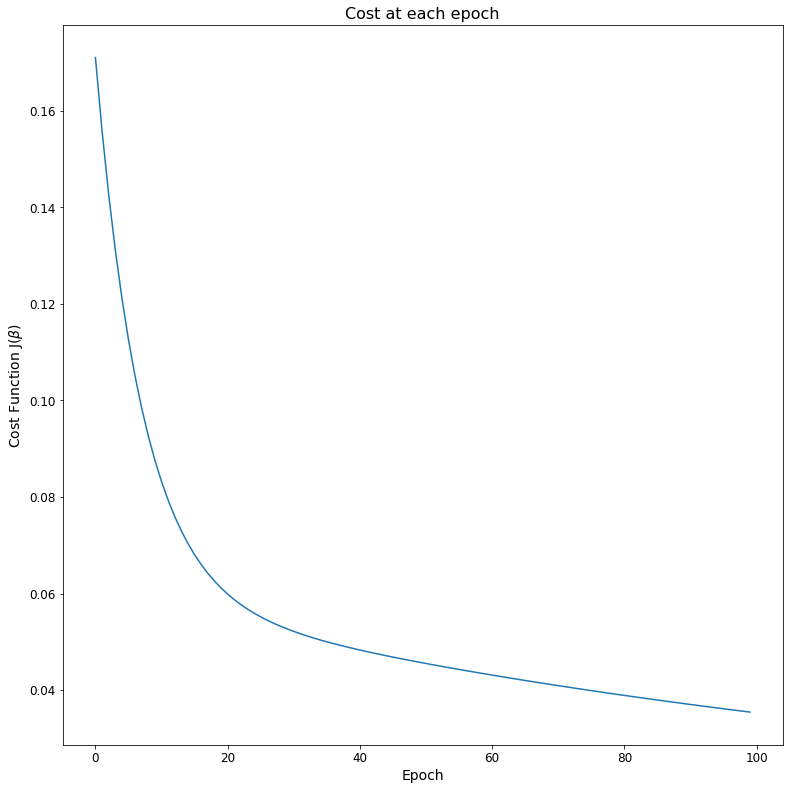

In [52]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([1,1,1,1])
ax.plot(epochs,costs)
ax.set_title('Cost at each epoch',fontsize=16)
ax.set_xlabel('Epoch',fontsize=14)
ax.set_ylabel('Cost Function J('+r'$\beta$'+')',fontsize=14)
ax.tick_params(labelsize=12)
plt.show()


In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(train_y,y_pred)
print('R squared=',r2)

R squared= 0.5488427996385263


In [54]:
pred_x = train_x
pred_y = h_x(beta,pred_x)
pred_y = (pred_y * y_range) + y_min
pred_x = df_group_year['Year']

In [55]:
beta0 = (y_min + y_range * beta[0, 0] - y_range * beta[0, 1] * x_min / x_range)
beta1 = y_range * beta[0, 1] / x_range

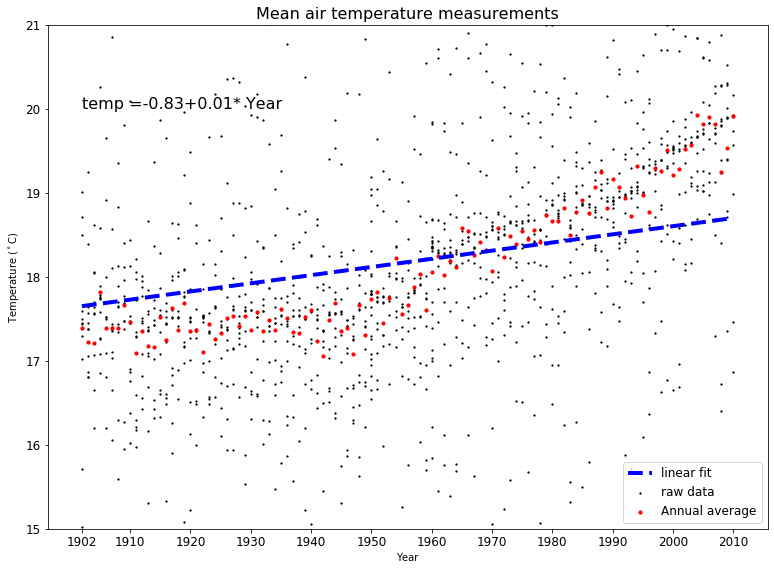

In [56]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([1,1,1,1])

raw_plot_data = df
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp,
           label='raw data',
           c='k',
           s=1.5 )

ax.scatter(df_group_year.Year,
           df_group_year.AvTemp,
           label = 'Annual average',
           c='red',
           s=10
          )
ax.plot(pred_x, pred_y,
       c='blue',
       linestyle='--',
       linewidth=4,
       label='linear fit'
       )

ax.text(1902, 20,
        'temp ='
        +
        str(round(beta0,2))
        +
        '+'
        +
        str(round(beta1,2))
        +
        '* Year',
        fontsize=16
        )
ax.set_title('Mean air temperature measurements',fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylim(15,21)
tick_years = [1902]+list(range(1910,2011,10)) 
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

#### Exercise - 3.06

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [58]:
df = pd.read_csv('synth_temp-Copy1.csv')

In [59]:
df = df.loc[df.Year >1901]
df_group_year= df.groupby(['Year']).agg({'RgnAvTemp':'mean'})

In [60]:
df_group_year['Year'] = df_group_year.index
df_group_year=df_group_year.rename(columns = {'RgnAvTemp':'AvTemp'})

In [61]:
x_min = df_group_year.Year.min()
x_range = df_group_year.Year.max()- df_group_year.Year.min()

In [62]:
y_min = df_group_year.AvTemp.min()
y_range = df_group_year.AvTemp.max() - df_group_year.AvTemp.min()

In [63]:
scale_x = (df_group_year.Year- x_min)/x_range
scale_y = (df_group_year.AvTemp - y_min)/ y_range

In [64]:
train_x = scale_x.ravel()
train_y = scale_y.ravel()

In [65]:
train_y

array([0.11467625, 0.05801712, 0.05629569, 0.26511017, 0.11516366,
       0.11451767, 0.11603218, 0.2112374 , 0.13990499, 0.01396047,
       0.1046274 , 0.04168416, 0.03634859, 0.16208319, 0.06738871,
       0.19910143, 0.10632883, 0.22198044, 0.10558894, 0.11026438,
       0.01835929, 0.13140575, 0.07137692, 0.09393682, 0.15984135,
       0.16625623, 0.12386977, 0.16515039, 0.10855087, 0.18435273,
       0.10310258, 0.15100838, 0.10767299, 0.1943738 , 0.15657261,
       0.10022181, 0.09689634, 0.16203838, 0.19081851, 0.06165705,
       0.        , 0.14780487, 0.21891532, 0.10458135, 0.11761443,
       0.00951324, 0.213347  , 0.08800315, 0.23689733, 0.26494486,
       0.13898722, 0.24205982, 0.40554178, 0.17285165, 0.2100122 ,
       0.2875892 , 0.33882829, 0.19119026, 0.34673786, 0.41604013,
       0.33777288, 0.39529384, 0.36730136, 0.53213528, 0.52027704,
       0.4190187 , 0.47108029, 0.43787083, 0.35310557, 0.53254469,
       0.41093704, 0.4958683 , 0.46473003, 0.52005471, 0.48464

In [66]:
np.random.seed(42)
model = SGDRegressor(
    loss = 'squared_loss',
    max_iter = 100,
    learning_rate = 'constant',
    eta0=0.0005,
    tol = 0.00009,
    penalty = 'none'
)

In [67]:
model.fit(train_x.reshape((-1,1)), train_y) #?

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=9e-05,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
beta0= (y_min + y_range * model.intercept_[0] - y_range*model.coef_[0] * x_min/x_range)
beta1 = y_range * model.coef_[0]/x_range
print(beta0)
print(beta1)

-0.5798539884018439
0.009587734834970016


In [69]:
pred_x = df_group_year['Year']
pred_y = model.predict(train_x.reshape((-1,1)))
r2 = r2_score(train_y,pred_y)
print(r2)

0.5436475116024911


In [70]:
pred_y = (pred_y *y_range)+y_min

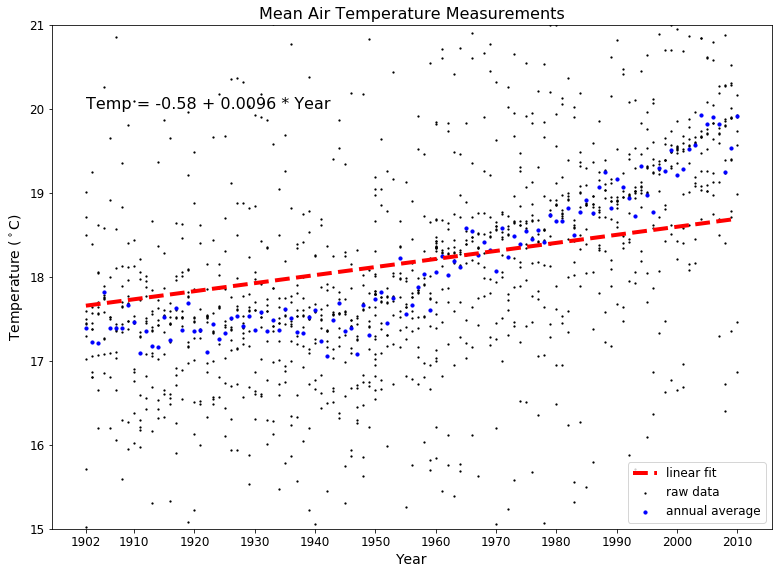

In [73]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])

raw_plot_data = df
ax.scatter(raw_plot_data.Year, raw_plot_data.RgnAvTemp,label = 'raw data',c = 'k', s=1.5)
ax.scatter(df_group_year.Year,df_group_year.AvTemp,label = 'annual average',c='blue',s=10)
ax.plot(pred_x,pred_y,label ='linear fit', linestyle='--',c='red', linewidth=4)
ax.text(1902,20,'Temp = ' + 
        str(round(beta0, 2)) +
        ' + ' +
        str(round(beta1, 4)) +
        ' * Year',
        fontsize = 16)
ax.set_title('Mean Air Temperature Measurements',
            fontsize = 16)
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

#### Exercise 3.07: Multiple Linear Regression



In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [74]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [80]:
power_data = pd.read_csv('./combined_cycle_power_plant-Copy1.csv')
power_data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [81]:
power_data.shape

(9568, 5)

In [82]:
missings = power_data.isnull().sum()
print(missings)

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [84]:
corr = power_data.corr()
corr

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [117]:
mask = np.ones((power_data.shape[1],power_data.shape[1]))
mask = [[1 if col<row else 0 
        for col in range(corr.shape[1])] 
        for row in range(corr.shape[0])]
mask

[[0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0]]

In [111]:
# list comprehension
x=np.zeros((3,4))
#print(x)
for row in range(x.shape[0]):
    for col in range(x.shape[1]):
        if col<row:
            x[row][col] =1
        else:
            x[row][col]=0

print(x)

x=[[1 if col<row else 0 
    for col in range(x.shape[1])] 
   for row in range(x.shape[0])]
print(x)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]
[[0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0]]


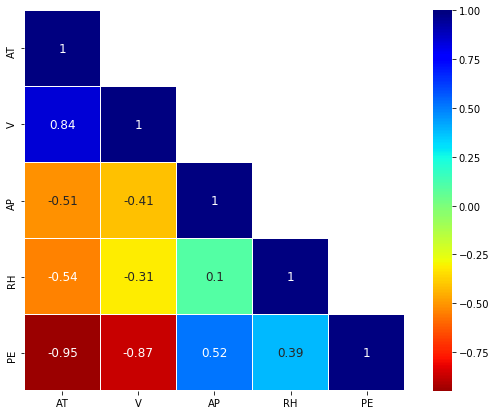

In [118]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap ='jet_r',square = True,
             annot = True,
            annot_kws={'size':12},
            xticklabels = power_data.columns,
            yticklabels =power_data.columns,
            center=0,
            linewidths = 0.5,
            mask = mask,
           )
plt.show()

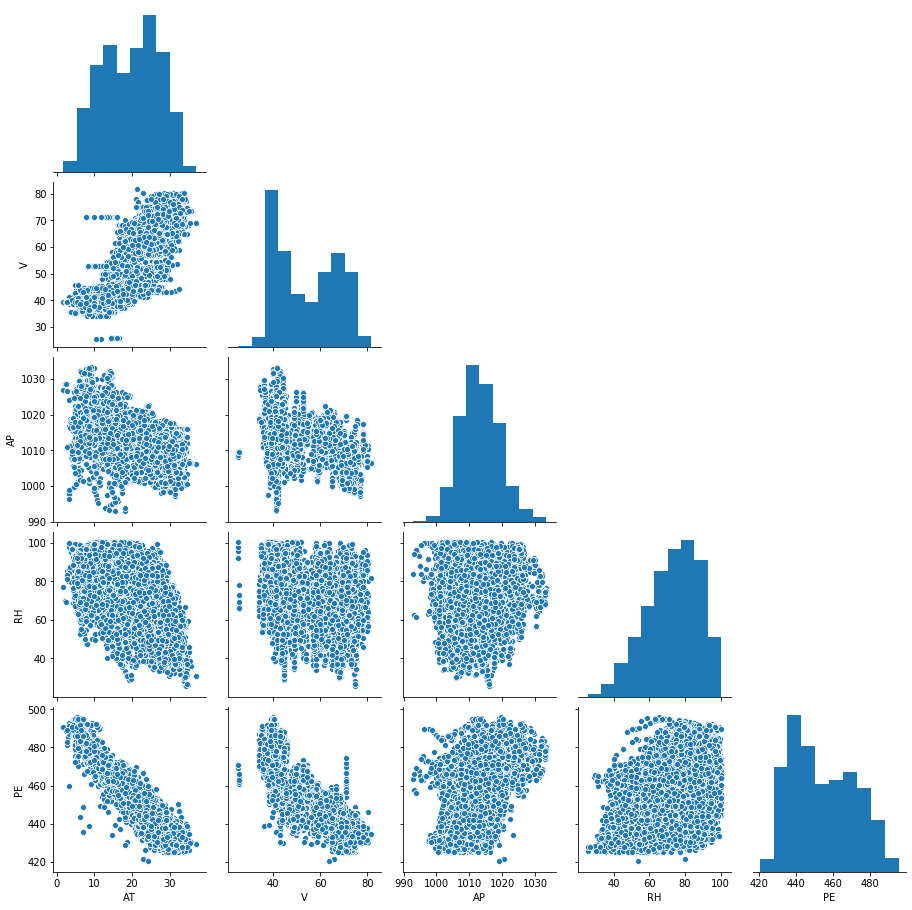

In [122]:
plot_grid = sns.pairplot(power_data,
                         corner =True
                        )

In [123]:
x_train = power_data.drop('PE',axis=1)
y_train = power_data['PE']

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
r2=model.score(x_train,y_train)
print('r2',str(round(r2,3)))
print('model coefficient', model.coef_)

r2 0.929
model coefficient [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


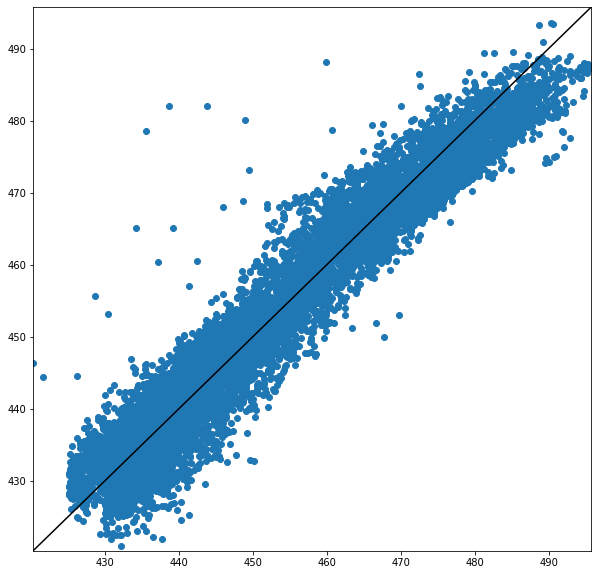

In [124]:
fig,ax = plt.subplots(figsize=(10,10))
#set limits
pe_range= max(power_data.PE)-max(power_data.PE)
plot_range= [min(power_data.PE)-.05*pe_range,
             max(power_data.PE)+.05*pe_range]
ax.scatter(y_train,y_pred)
ax.set_xlim(plot_range)
ax.set_ylim(plot_range)
ax.plot(plot_range,plot_range,c='black')
plt.show()